In [140]:
using LinearAlgebra, Plots, LaTeXStrings

## Exercise 1

In [142]:
G0(x) = 1 - x
G1(x) = x

function G(x, xbar)
   if x < xbar
       return x*(xbar - 1)
    elseif x >= xbar
        return xbar*(x - 1) 
    end
end

G (generic function with 2 methods)

In [143]:
function make_inverse(m)
    h = 1/(m-1)
    B = zeros(m,m)

    B[:,1] .= [G0(i*h) for i in 0:(m-1)]
    B[:, end] .= [G1(i*h) for i in 0:(m-1)]
    
    # Just Interior Rows
    for j in 1:(m-2)
       B[:,j+1] .= [h*G(i*h, j*h) for i in 0:(m-1)]
    end
    
    return B
end

make_inverse (generic function with 1 method)

In [144]:
B = make_inverse(4)

4×4 Array{Float64,2}:
 1.0       -0.0        -0.0        0.0
 0.666667  -0.0740741  -0.037037   0.333333
 0.333333  -0.037037   -0.0740741  0.666667
 0.0        0.0         0.0        1.0

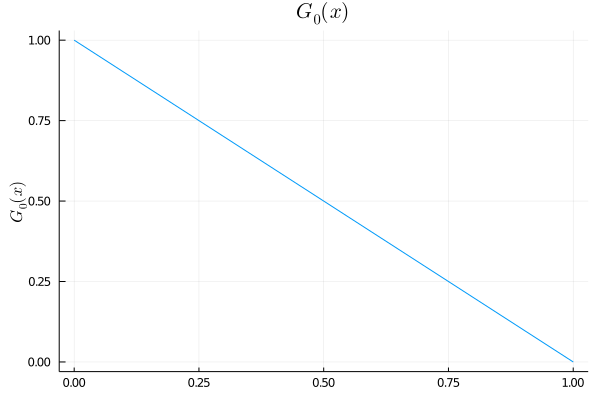

In [145]:
G0_plot = plot(G0, 0, 1,
    title = L"G_0(x)",
    ylab = L"G_0(x)",
    label = false)

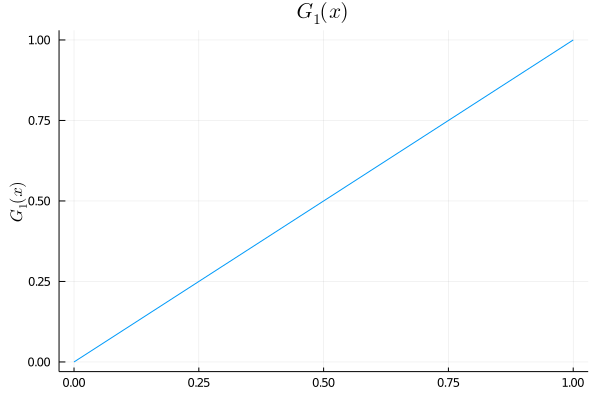

In [146]:
G1_plot = plot(G1, 0, 1,
    title = L"G_1(x)",
    ylab = L"G_1(x)",
    label = false)

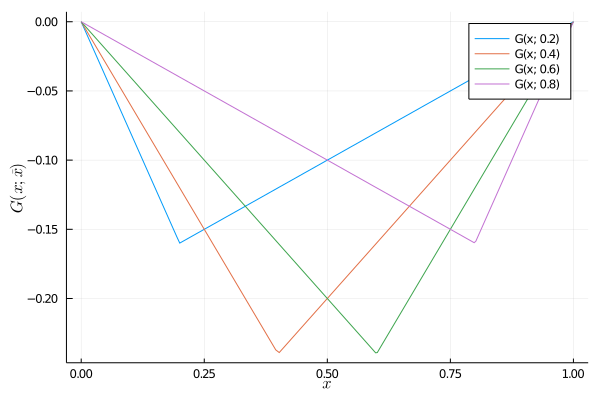

In [156]:
plot(x -> G(x, 0.2), 0, 1,
        label = "G(x; 0.2)",
        xlab = L"x",
        ylab = L"G(x; \bar{x})")

for xbar in 0.4:0.2:0.8
    plot!(x -> G(x, xbar), 0, 1,
            label = "G(x; $xbar)")
end

G_x_plot = plot!()

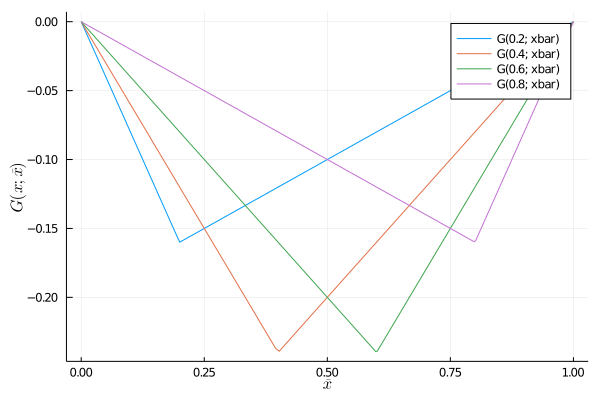

In [157]:
plot(xbar -> G(0.2, xbar), 0, 1,
        label = "G(0.2; xbar)",
        xlab = L"\bar{x}",
        ylab = L"G(x; \bar{x} )")

for x in 0.4:0.2:0.8
    plot!(xbar -> G(x, xbar), 0, 1,
            label = "G($x; xbar)")
end

G_xbar_plot = plot!()

In [177]:
Greens_plot = plot(G0_plot, G1_plot, G_x_plot, G_xbar_plot, size = (800,800)) 
savefig("../hw/figs/hw-1-greens-plot.png")

In [159]:
function discretize_f(f, m)
    h = 1/(m-1)
    
    # Assume that endpoints are one
    F = ones(m)
    
    for i in 1:(m-2)
        F[i+1] = f(i*h)
    end
    return F
end

f(x) = x
discretize_f(f, 4)

4-element Array{Float64,1}:
 1.0
 0.3333333333333333
 0.6666666666666666
 1.0

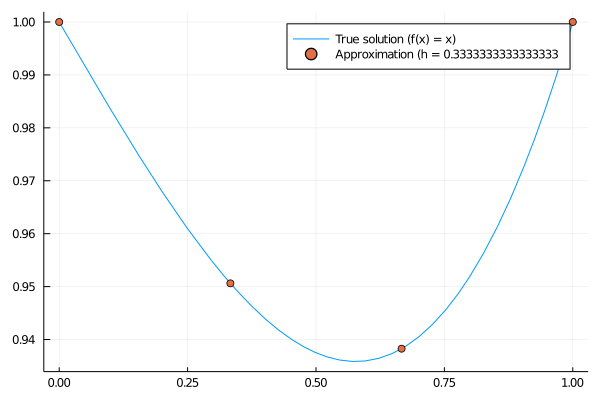

In [163]:
m = 4
B = make_inverse(m)
F = discretize_f(f, m)

plot(x -> x^3/6 - x/6 + 1, 0, 1,
    label = "True solution (f(x) = x)")

approx_plot_1 = scatter!([ i/(m-1) for i in 0:(m-1)], B*F,
    label = "Approximation (h = $(1/(m-1))")

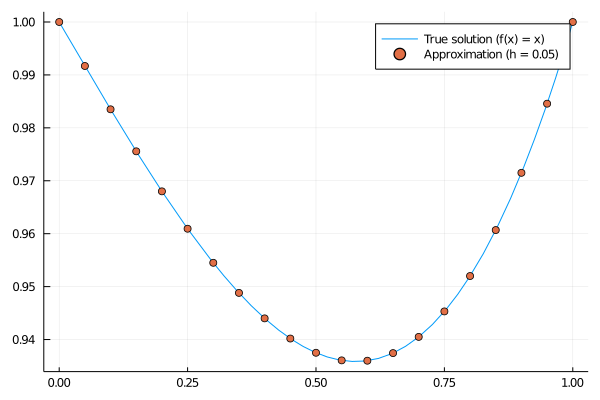

In [164]:
m = 21
B = make_inverse(m)
F = discretize_f(f, m)

plot(x -> x^3/6 - x/6 + 1, 0, 1,
    label = "True solution (f(x) = x)")

approx_plot_2 = scatter!([ i/(m-1) for i in 0:(m-1)], B*F,
    label = "Approximation (h = $(1/(m-1)))")

In [178]:
approx_plot = plot(approx_plot_1, approx_plot_2, layout = (1,2), size = (800, 400))
savefig("../hw/figs/hw-1-approx-plot.png")